In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline

/Users/icchy/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
mnist = [train_images, train_labels, test_images, test_labels]
for i in mnist:
    print(type(i))
    print(len(i))

<class 'numpy.ndarray'>
60000
<class 'numpy.ndarray'>
60000
<class 'numpy.ndarray'>
10000
<class 'numpy.ndarray'>
10000


In [5]:
keras.backend.image_data_format()

'channels_last'

In [11]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

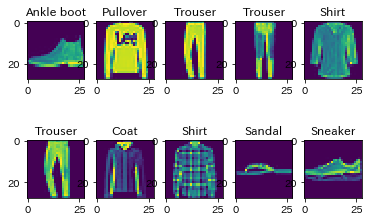

In [14]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title(class_names[test_labels[i]])
    plt.imshow(test_images[i].reshape(28, 28))

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [17]:
model = keras.Sequential([
    keras.layers.Conv2D(32, 
                        kernel_size=(3, 3), 
                        activation='relu', 
                        input_shape=(28, 28, 1)),
    keras.layers.Conv2D(64, 
                       kernel_size=(3, 3), 
                       activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax'),
])

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.4715 - acc: 0.8327
Epoch 2/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.3209 - acc: 0.8844
Epoch 3/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.2708 - acc: 0.9013
Epoch 4/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.2416 - acc: 0.9111
Epoch 5/10
60000/60000 [==============================] - 108s 2ms/step - loss: 0.2200 - acc: 0.9191
Epoch 6/10
60000/60000 [==============================] - 109s 2ms/step - loss: 0.2008 - acc: 0.9257
Epoch 7/10
60000/60000 [==============================] - 109s 2ms/step - loss: 0.1848 - acc: 0.9311
Epoch 8/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.1741 - acc: 0.9349
Epoch 9/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.1600 - acc: 0.9408
Epoch 10/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.1515 - a

In [21]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 5s 495us/step


[0.2312500939846039, 0.9211]

In [23]:
model.predict(test_images[0:1])

array([[1.5539843e-14, 8.5009674e-18, 8.7412990e-16, 6.0657866e-16,
        2.1131000e-16, 6.8233252e-10, 4.3999979e-16, 9.9675219e-07,
        5.7988876e-16, 9.9999905e-01]], dtype=float32)